In [21]:
import numpy as np
import matplotlib.pyplot as plt
 

In [22]:
N, D_in, H, D_out = 2,100,50,1 # 데이터의 개수, 뇌세포의 출발점, 뇌세포 다발의 개수, 결론의 수치

In [23]:
x = np.random.randn(N, D_in) # 뇌세포의 가중치
y = np.random.randn(N, D_out)

print(x.shape)
print(y.shape)

(2, 100)
(2, 1)


In [24]:
w1 = np.random.randn(D_in, H) # 아직 학습되지 않은 뇌세포의 가중치 1
w2 = np.random.randn(H, D_out) # 아직 학습되지 않은 뇌세포의 가중치 2

print(w1.shape)
print(w2.shape)

(100, 50)
(50, 1)


In [25]:
y_pred_list = list()
loss_list = list()
learning_rate = 1e-6
for t in range(500): # 반복 학습을 통해 교육
    h = x.dot(w1)
    h_relu = np.maximum(h,0)
    y_pred = h_relu.dot(w2) # 예측값
    y_pred_list.append(y_pred[0][0])
    
    loss = np.square(y_pred - y).sum() #뇌세포가 예측한 값과 실제 값과의 비교(두 수의 합)
    loss_list.append(loss)
    print(t, loss)
    
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    # 학습을 통해 0으로 줄어드는걸 볼 수 있음

0 4866.2212451833075
1 4725.710573314951
2 4589.4101705039
3 4457.188715372847
4 4328.919200524993
5 4204.478780045983
6 4083.748622969378
7 3966.613772441844
8 3852.9630103373474
9 3742.688727082062
10 3635.686796463946
11 3531.8564552117177
12 3431.1001871386984
13 3333.323611657026
14 3238.4353764769744
15 3146.3470543152994
16 3056.9730434446105
17 2970.230471924142
18 2886.039105359437
19 2804.3212580459826
20 2725.001707358289
21 2648.0076112524785
22 2573.2684287565653
23 2500.7158433281593
24 2430.2836889650507
25 2362.0304547840665
26 2295.8922922423217
27 2231.6748501477628
28 2169.3204539224084
29 2108.773224574644
30 2049.979020114762
31 1992.8853790135795
32 1937.441465625917
33 1883.5980175042043
34 1831.3072945305848
35 1780.5230297989033
36 1731.2003821809765
37 1683.2958905141772
38 1636.7674293500422
39 1591.5741662060839
40 1547.6765202654415
41 1505.03612247119
42 1463.6157769643216
43 1423.379423816526
44 1384.2921030108057
45 1346.3199196248877
46 1309.43001017418

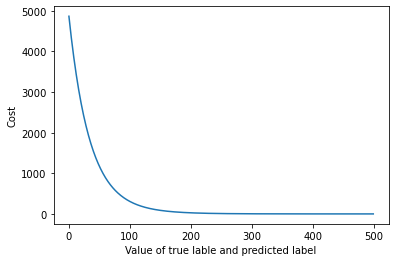

In [27]:
step_list = [i for i in range(len(loss_list))]
plt.plot(step_list, loss_list)
plt.ylabel('Cost')
plt.xlabel('Value of true lable and predicted label')
plt.show()